GSAPP PLA6113 Wednesday March 10, 2021<br>
Exploring Urban Data with ML <br>
Erik Strand

# Clustering - More Algorithms

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Agglomerative Clustering Algorithm
### (1) Create random dataset

In [2]:
from sklearn.datasets import make_blobs

In [3]:
# create dataset (even though we will use only X, which is input features, but it comes with y variable from make_blobs)
X, y = make_blobs(
   n_samples=200, n_features=2, # create (200,2) shape data points - in other words, 200 rows and 2 columns
   centers=3, cluster_std=0.4,
   shuffle=True, random_state=0
)

In [4]:
print (X.shape)

(200, 2)


Text(0.5, 1.0, 'Scatter plot - two dimensional data')

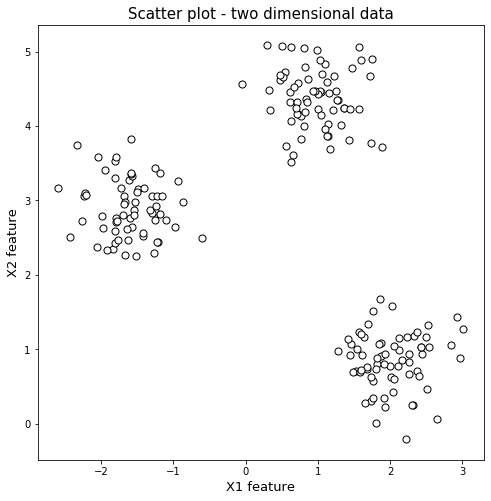

In [5]:
# Plot X (two dimensional data)
plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1],
           c='white', marker='o',
           edgecolor='black', s=50)

plt.xlabel('X1 feature', fontsize=13)
plt.ylabel('X2 feature', fontsize=13)
plt.title('Scatter plot - two dimensional data', fontsize=15)

### (2) Load module

You can find various clustering algorithms privded by sklearn here (https://scikit-learn.org/stable/modules/clustering.html)

In [6]:
from sklearn.cluster import AgglomerativeClustering # for clustering
import scipy.cluster.hierarchy as sch # for dendrogram

### (3) Dendrogram to determine optimal number of clusters

Text(0.5, 1.0, 'Dentrogarm for determining optimal number of clusters')

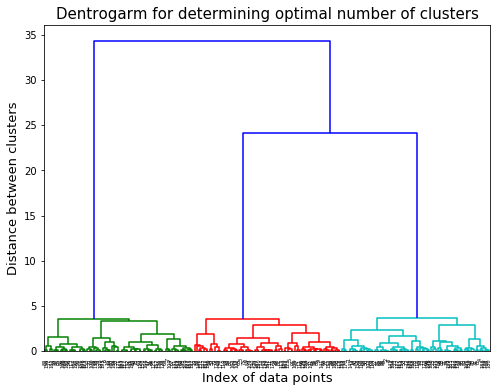

In [7]:
plt.figure(figsize=(8,6))
dendogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.xlabel('Index of data points', fontsize=13)
plt.ylabel('Distance between clusters', fontsize=13)
plt.title('Dentrogarm for determining optimal number of clusters', fontsize=15)

Looking at the dendrogram, the highest vertical distance that doesn’t intersect with any clusters is the middle blue one. Given that 3 vertical lines cross the threshold, the optimal number of clusters is 3.

### (4) Build your Agglomerative clustering model and fit to your data to create clusters

Resource: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering

Syntax: 

    YOUR_MODEL_NAME = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

In [8]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

model.fit(X)
labels = model.labels_

In [9]:
print (labels)

[2 0 0 2 0 2 1 1 0 2 0 2 0 0 0 2 1 1 0 2 2 1 0 0 2 0 1 2 2 2 0 0 2 0 1 1 0
 1 1 2 1 2 2 2 0 0 0 2 0 0 0 1 2 2 2 2 1 1 0 0 2 2 0 1 1 2 1 1 2 1 1 0 0 2
 0 2 1 1 1 2 2 0 0 1 1 0 0 2 0 1 2 2 1 0 1 0 0 2 2 1 1 0 2 0 2 0 1 0 0 1 0
 2 1 2 0 0 0 1 2 2 1 1 2 0 1 0 2 1 2 0 2 1 1 1 0 1 1 0 1 2 2 2 0 1 1 0 2 2
 1 0 1 2 2 2 0 1 1 1 0 0 2 2 2 2 0 0 1 2 1 1 0 1 0 1 2 2 0 2 0 1 0 2 1 1 1
 0 2 1 0 0 2 2 1 1 1 1 2 1 0 1]


### (5) Plot clustering result with labels

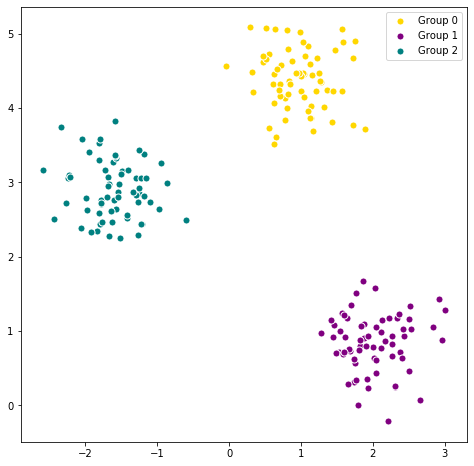

In [10]:
colors = ['gold', 'purple', 'teal']

plt.figure(figsize=(8,8))
for i in [0,1,2]:
    plt.scatter(X[labels==i, 0], X[labels==i, 1], s=50, c=colors[i], label ='Group %s'%(i),
               marker='o',
           edgecolor='white')
plt.legend()

# 2. Gaussian Mixture Clustering Algorithm
### (1) Create random dataset

In [11]:
from sklearn.datasets.samples_generator import make_blobs
X_gmm, y_gmm = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)

Text(0.5, 1.0, 'Scatter plot - two dimensional data')

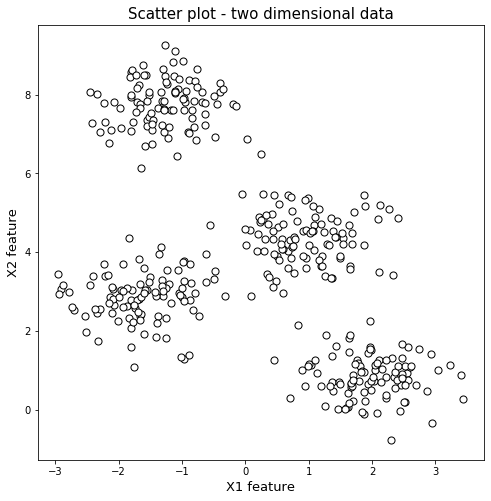

In [12]:
plt.figure(figsize=(8,8))
plt.scatter(X_gmm[:,0], X_gmm[:,1],
           c='white', marker='o',
           edgecolor='black', s=50)

plt.xlabel('X1 feature', fontsize=13)
plt.ylabel('X2 feature', fontsize=13)
plt.title('Scatter plot - two dimensional data', fontsize=15)

### (2) Load module for Gussian Mixture Model
Resource: https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html

In [13]:
from sklearn.mixture import GaussianMixture

### (3) Build your Gaussian Mixture Clustering model and fit to your data to create clusters

Syntax:

    YOUR_MODEL_NAME = GaussianMixture(n_components=1, covariance_type='full')

In [14]:
gmm = GaussianMixture(n_components=4, covariance_type='full')

gmm.fit(X_gmm)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=4, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

### (4) Check probablities that points belongs to the given cluster
Because GMM contains a probabilistic model under the hood, it is possible to find probabilistic cluster assignments—in Scikit-Learn this is done using the predict_proba method. This returns a matrix of size [n_samples, n_clusters] which measures the probability that any point belongs to the given cluster:

Syntax:
    
       YOUR_PROBABILITY_LIST_NAME = YOUR_MODEL_NAME.predict_proba(DATA)

In [15]:
probs = gmm.predict_proba(X_gmm)
print (probs.shape)
print(probs[:5].round(3))

(400, 4)
[[0.    0.469 0.    0.531]
 [1.    0.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.    0.    0.    1.   ]
 [1.    0.    0.    0.   ]]


### (5) Assign a label to each data point

In [16]:
labels = gmm.predict(X_gmm) 
print (labels)

[3 0 0 3 0 1 2 3 0 2 1 2 3 0 0 2 0 2 3 0 0 0 1 3 3 1 1 3 3 2 3 3 0 3 0 1 2
 3 2 3 0 1 2 3 2 1 2 2 2 1 1 1 0 1 1 0 3 2 2 0 2 2 2 2 3 0 2 3 0 1 0 3 0 1
 2 0 3 0 1 0 0 3 2 1 3 0 0 3 0 2 0 2 3 0 0 1 3 2 2 2 1 2 3 3 0 1 3 1 2 0 0
 0 3 0 1 2 1 0 1 1 2 0 2 1 3 1 2 2 2 3 1 1 1 0 3 0 1 3 1 0 3 0 0 1 0 2 3 0
 2 0 2 3 2 3 1 0 2 0 0 0 3 0 1 0 0 1 2 2 0 1 1 1 1 2 2 2 3 0 3 1 3 1 0 3 1
 0 1 3 3 1 3 3 1 0 1 1 1 2 2 3 3 0 2 2 1 3 0 1 3 1 3 3 2 2 1 2 3 1 2 1 0 3
 1 0 0 0 2 1 3 1 3 0 3 3 1 2 0 2 3 0 2 3 3 1 2 3 1 3 2 0 0 2 0 3 1 1 3 3 2
 1 3 0 0 0 1 3 3 3 3 3 2 3 3 1 0 2 1 2 2 2 1 2 2 1 1 1 2 3 2 3 2 0 3 2 0 3
 2 2 3 0 1 1 3 1 2 2 3 1 1 2 2 3 1 3 2 3 2 1 0 0 2 0 3 0 0 1 0 1 2 0 1 2 1
 3 0 3 0 2 3 2 1 2 2 2 2 1 2 0 2 0 2 3 1 0 2 2 3 0 0 1 1 1 0 3 2 3 0 2 0 1
 0 3 3 0 1 3 1 1 0 1 0 1 3 3 3 0 1 1 1 1 0 1 3 2 2 3 3 2 3 2]


### (6) Plot the clustering result with labels and contour lines (Gaussian distribution contour)

In [17]:
# Computing distribution for contour lines
X, Y = np.meshgrid(np.linspace(-4, 4), np.linspace(-1,10)) # rectengular grid
XX = np.array([X.ravel(), Y.ravel()]).T
Z = gmm.score_samples(XX)
Z = Z.reshape(X.shape)

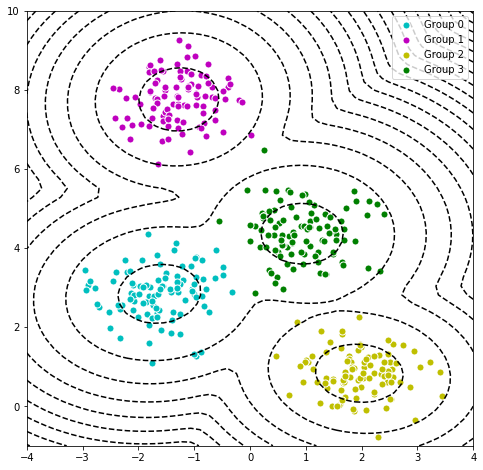

In [18]:
# you can use for loops for labeling
colors = ['c', 'm', 'y', 'green'] # you can use any other colors

plt.figure(figsize=(8,8))
for i in [0,1,2,3]:
    plt.scatter(X_gmm[labels==i, 0], X_gmm[labels==i, 1], s=50, c=colors[i], label ='Group %s'%(i),
               marker='o',
           edgecolor='white')
    
plt.contour(X, Y, Z, 20, colors='k')

plt.legend()

# 3. DBSCAN

### (1) Create random dataset

Text(0.5, 1.0, 'Scatter plot - two dimensional data')

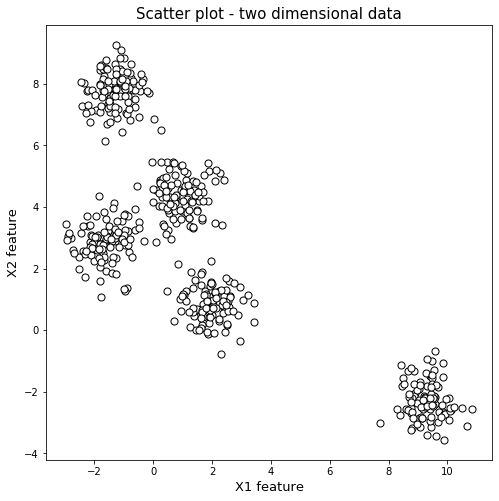

In [19]:
X_db, y_db = make_blobs(n_samples=500, centers=5, cluster_std=0.60, random_state=0)
# Plot X (two dimensional data)
plt.figure(figsize=(8,8))
plt.scatter(X_db[:,0], X_db[:,1],
           c='white', marker='o',
           edgecolor='black', s=50)

plt.xlabel('X1 feature', fontsize=13)
plt.ylabel('X2 feature', fontsize=13)
plt.title('Scatter plot - two dimensional data', fontsize=15)

### (2) Load module
Resource: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

In [20]:
from sklearn.cluster import DBSCAN

### (3) Build your DBSCAN model and fit to your data to create clusters

Syntax:

YOUR_MODEL_NAME = DBSCAN(epx=0.5, min_samples=5)

In [21]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_db)
labels = dbscan.labels_

### (4) Count your clusters and assigned elements
Noisy samples are given the label -1.

In [22]:
from collections import Counter
print (Counter(labels))
print (len(Counter(labels)))

Counter({1: 99, 3: 98, 4: 97, 0: 96, 2: 93, -1: 17})
6


### (5) Plot the clustering result with labels

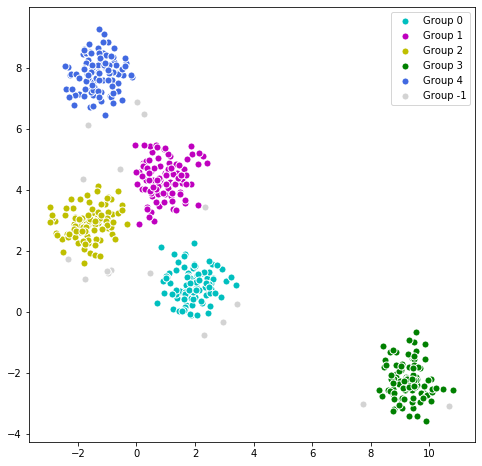

In [23]:
# you can use for loops for labeling
colors = ['c', 'm', 'y', 'green','royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 
          'deeppink', 'orange', 'goldenrod', 'lightcyan', 'lightgrey'] # you can use any other colors

plt.figure(figsize=(8,8))
for i in list(Counter(labels).keys()):
    plt.scatter(X_db[labels==i, 0], X_db[labels==i, 1], s=50, c=colors[i], label ='Group %s'%(i),
               marker='o',
           edgecolor='white')

plt.legend()

### (6) Parameter estimation

We must provide a value for epsilon which defines the maximum distance between two points. Then how do we determine the optimal value for eps?

We can calculate the distance from each point to its closest neighbour using the NearestNeighbors. The point itself is included in n_neighbors. The k neighbors method returns two arrays, one which contains the distance to the closest n_neighbors points and the other which contains the index for each of those points.

In [24]:
from sklearn.neighbors import NearestNeighbors

In [25]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X_db)
distances, indices = nbrs.kneighbors(X_db)

Text(0, 0.5, 'Distance')

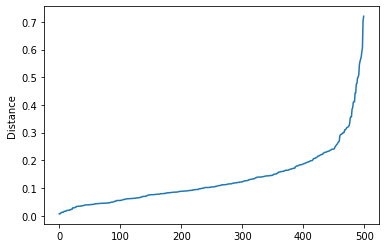

In [26]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.ylabel('Distance')

The optimal value for epsilon will be found at the point of maximum curvature. Here we select 0.3.

In [27]:
dbscan = DBSCAN(eps=0.3, min_samples=3)
dbscan.fit(X_db)
labels = dbscan.labels_

In [28]:
print (Counter(labels))
print (len(Counter(labels)))

Counter({7: 94, 6: 86, 1: 84, 5: 84, 3: 82, -1: 42, 2: 6, 9: 6, 4: 5, 10: 5, 0: 3, 8: 3})
12


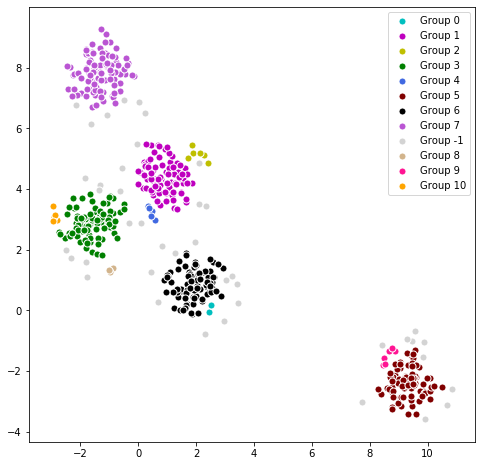

In [29]:
# you can use for loops for labeling
colors = ['c', 'm', 'y', 'green','royalblue', 'maroon', 'k', 'mediumorchid', 'tan', 
          'deeppink', 'orange', 'goldenrod', 'lightcyan', 'lightgrey'] # you can use any other colors

plt.figure(figsize=(8,8))
for i in list(Counter(labels).keys()):
    plt.scatter(X_db[labels==i, 0], X_db[labels==i, 1], s=50, c=colors[i], label ='Group %s'%(i),
               marker='o',
           edgecolor='white')

plt.legend()

# Data Challenge

In [30]:
from sklearn import cluster, datasets, mixture
n_samples = 1500
random_state = 170

X1,y1= datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

X2,y2 = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)

Text(0.5, 1.0, 'Scatter plot - two dimensional data')

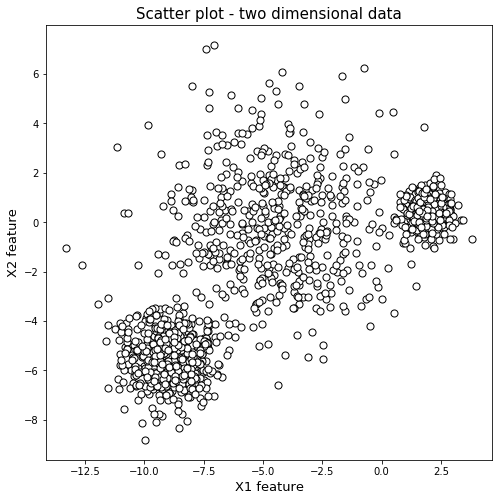

In [31]:
plt.figure(figsize=(8,8))
plt.scatter(X1[:,0], X1[:,1],
           c='white', marker='o',
           edgecolor='black', s=50)

plt.xlabel('X1 feature', fontsize=13)
plt.ylabel('X2 feature', fontsize=13)
plt.title('Scatter plot - two dimensional data', fontsize=15)

Text(0.5, 1.0, 'Scatter plot - two dimensional data')

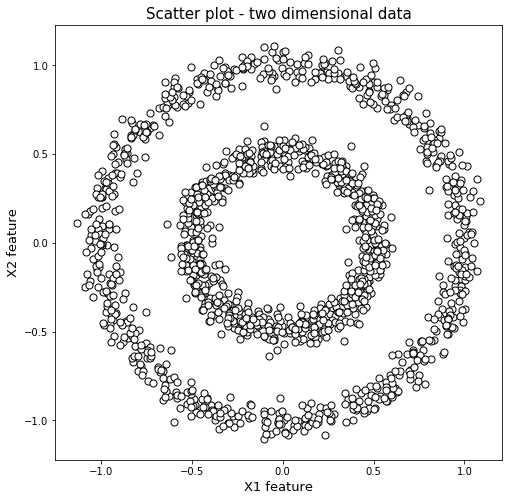

In [32]:
plt.figure(figsize=(8,8))
plt.scatter(X2[:,0], X2[:,1],
           c='white', marker='o',
           edgecolor='black', s=50)

plt.xlabel('X1 feature', fontsize=13)
plt.ylabel('X2 feature', fontsize=13)
plt.title('Scatter plot - two dimensional data', fontsize=15)